# Homework 1: Data Science Libraries, Pt 1

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set_context("notebook")
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will learn commonly used data wrangling operations/tools in Pandas. We aim to give you familiarity with:

* Creating dataframes
* Slicing data frames (i.e. selecting rows and columns)
* Filtering data (using boolean arrays)

In this assignment you will use several pandas methods, such as `drop` and `loc`. You may press `shift+tab` on the method parameters to see the documentation for that method. If you are familar with the `datascience` library used in Data 8, this [conversion notebook](https://github.com/data-8/materials-x19/blob/master/reference/Datascience%20to%20Pandas%20Conversion%20Notebook.ipynb) may serve as a useful guide.

# Part 1: Basics of the Basics

## Creating DataFrames & Basic Manipulations

A [dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a table in which each column has a type; there is an index over the columns (typically string labels) and an index over the rows (typically ordinal numbers).

The [docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) for the pandas `DataFrame` class  provide at least two syntaxes to create a data frame.

 **Syntax 1: You can create a data frame by specifying the columns and values using a dictionary as shown below.**

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [3]:
fruit_info = pd.DataFrame(
    data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink']
          })
fruit_info

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


**Syntax 2: You can also define a dataframe by specifying the rows like below.**

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [4]:
fruit_info2 = pd.DataFrame(
    [("red", "apple"), ("orange", "orange"), ("yellow", "banana"),
     ("pink", "raspberry")], 
    columns = ["color", "fruit"])
fruit_info2

,color,fruit
0,red,apple
1,orange,orange
2,yellow,banana
3,pink,raspberry


You can obtain the dimensions of a dataframe by using the shape attribute `dataframe.shape`.

In [5]:
fruit_info.shape

(4, 2)

You can also convert the entire dataframe into a two-dimensional numpy array. This is used in modeling, particularly with the `scikitlearn` library most commonly used in modeling.

In [6]:
fruit_info.values


array([['apple', 'red'],
       ['orange', 'orange'],
       ['banana', 'yellow'],
       ['raspberry', 'pink']], dtype=object)

### Question 1(a)

For a DataFrame `d`, you can add a column with `d['new column name'] = ...` and assign a list or array of values to the column. Add a column of integers containing 1, 2, 3, and 4 called `rank1` to the `fruit_info` table which expresses your personal preference about the taste ordering for each fruit (1 is tastiest; 4 is least tasty). 


In [7]:
#SOLUTION
fruit_info['rank1'] = [2,3,1,4]
fruit_info

,fruit,color,rank1
0,apple,red,2
1,orange,orange,3
2,banana,yellow,1
3,raspberry,pink,4


### Question 1(b)

You can also add a column to `d` with `d.loc[:, 'new column name'] = ...`. This way to modify an existing dataframe is faster and therefore preferred over the assignment syntax above. As discussed in lecture, the first parameter is for the rows and second is for columns. The `:` means change all rows and the `new column name` indicates the column you are modifying (or in this case, adding). 

Add a column called `rank2` to the `fruit_info` table which contains the same values in the same order as the `rank1` column.

In [8]:
#SOLUTION
fruit_info.loc[:, 'rank2'] = [2,3,1,4]
fruit_info

,fruit,color,rank1,rank2
0,apple,red,2,2
1,orange,orange,3,3
2,banana,yellow,1,1
3,raspberry,pink,4,4


### Question 2

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) both the `rank1` and `rank2` columns you created. (Make sure to use the `axis` parameter correctly.) Note that `drop` does not change a table, but instead returns a new table with fewer columns or rows unless you set the optional `inplace` parameter.

*Hint*: Look through the documentation to see how you can drop multiple columns of a Pandas dataframe at once using a list of column names.

In [11]:
#SOLUTION
fruit_info_original = fruit_info.drop(['rank1', 'rank2'], axis=1)
fruit_info_original

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


### Question 3

Use the .rename() method to rename the columns of fruit_info_original so they begin with capital letters. Set the inplace parameter correctly to change the fruit_info_original dataframe.

Use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) the columns of `fruit_info_original` so they begin with capital letters. Set the `inplace` parameter correctly to change the `fruit_info_original` dataframe. 

In [12]:
#SOLUTION
fruit_info_original = fruit_info_original.rename(columns={"fruit": "Fruit", "color": "Color"})
fruit_info_original

,Fruit,Color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


# Part 2: Self-Study
## Readings

UC Berkeley's Data 100 is a core class in the data science major curriculum, and does an excellent job teaching the libraries most commonly used in data science. If you have time, definitely go through the curriculum. For this week, please: 

**Go through these slides**:

1. Pandas 1 https://docs.google.com/presentation/d/1RjphqhsYezBVklHqPvJvzaunQc0wAojFbZMHmixD8Yw/edit#slide=id.g4114e65f62_0_143

2. Pandas 2
https://docs.google.com/presentation/d/1HfdsSHXCJkUFUmVNTXjel3yx4_WYCfcpDwGi6zcVQEM/edit#slide=id.g407c66229f_137_0

3. EDA & Visualization 
http://www.ds100.org/fa19/resources/assets/lectures/lec07/07-EDAandVizAnnotated.pdf

4. Visualization
http://www.ds100.org/fa19/resources/assets/lectures/lec08/08-VizPrinciples.pdf



# Part 3: Seaborn

We will be using a Pokemon dataset for this portion.

In [13]:
poke = pd.read_csv('Pokemon.csv', encoding= 'unicode_escape')
poke.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


**Make a scatter plot of Attack and Defense stats for our Pokémon. It should take 1 line of code; use the `lmplot()`function**

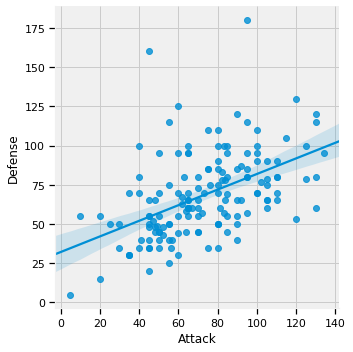

In [14]:
#SOLUTION
sns.lmplot(x="Attack", y="Defense", data=poke)

**The default here is to plot a regression line. Looking at the documentation for `seaborn`, remove the line**

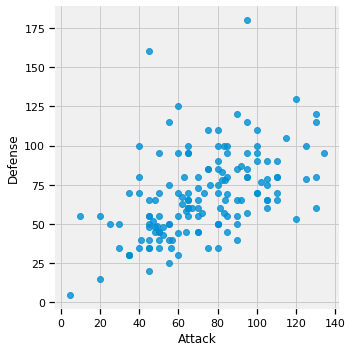

In [15]:
#SOLUTION
sns.lmplot(x="Attack", y="Defense", data=poke, fit_reg = False)

**Create the same plot. Add the argument `hue='Stage'` and observe the difference.**

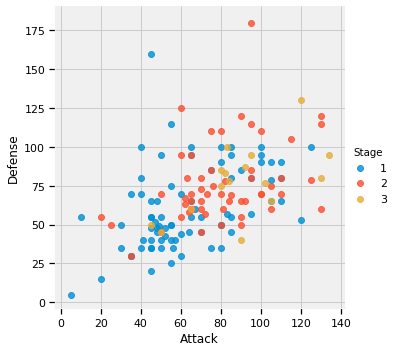

In [16]:
#SOLUTION
sns.lmplot(x="Attack", y="Defense", data=poke, fit_reg = False, hue='Stage')

### Customizing with `matplotlib`


`matplotlib` is great for simple plots. `seaborn` is a high-level interface essentially to make the matplotlib plots look prettier (think matplotlib is the foundation, seaborn is built on top). `seaborn` also has more variety of visualizations (violin plots) and has less syntax and prettier default color themes. 

Sometimes for more customized details, we will use `matplotlib` (Data 8 teaches in `matplotlib`). We dive into that here.

If you're curious: 
* https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html

* https://www.quora.com/What-is-the-difference-between-Matplotlib-and-Seaborn-Which-one-should-I-learn-for-studying-data-science

* https://analyticsindiamag.com/comparing-python-data-visualization-tools-matplotlib-vs-seaborn/



**First, copy paste your code from the final plot above (`hue='Stage'`, no regression line)**

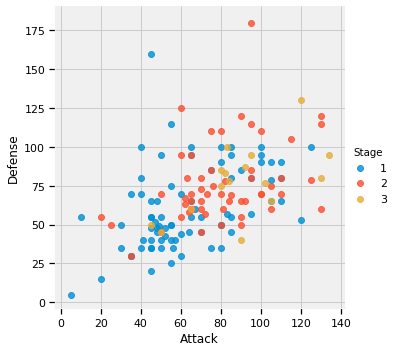

In [17]:
#SOLUTION
plot = sns.lmplot(x="Attack", y="Defense", data=poke, fit_reg = False, hue='Stage')

**Now, invoke Matplotlib's customization functions. Use the `ylim()` and `xlim()` functions.**

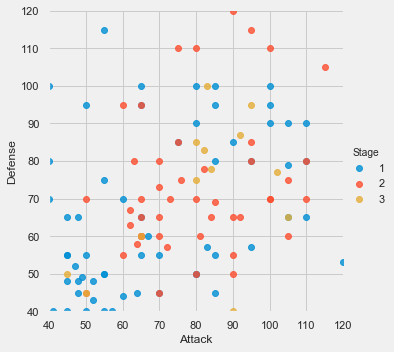

In [139]:
sns.lmplot(x='Attack', y='Defense', data=poke,
           fit_reg=False, 
           hue='Stage')
#SOLUTION
# Tweak using Matplotlib
plt.ylim(40, 120)
plt.xlim(40, 120);

For more information on Matplotlib's customization functions, check out its [documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)

### Tying in with Pandas

Seaborn's plotting functions benefit from a DataFrame format, which is the format that `pandas` works with. `pandas` is used to read/organize/clean etc the data, while seaborn is great for plotting data in the dataframe format.


In [67]:
#Set params 
rcParams['figure.figsize'] = 10, 10
# Set theme
sns.set_style('whitegrid')

**For example, let's say we wanted to make a box plot for our Pokémon's combat stats**

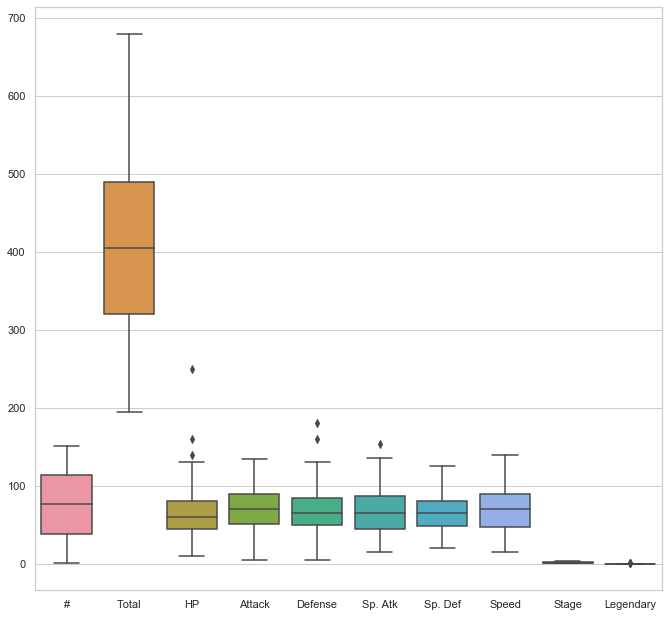

In [63]:
sns.boxplot(data=poke)

That's a reasonable start, but there are some columns we'd probably like to remove:

* We can remove the Total since we have individual stats.
* We can remove the Stage and Legendary columns because they aren't combat stats.

This isn't really doable in seaborn, so instead we work with pandas to pre-format the DataFrame.

Call this stats_df.

In [29]:
#SOLUTION
# Pre-format DataFrame
stats_df = poke.drop(['Total', 'Stage', 'Legendary'], axis=1)

**Now, recreate the same boxplot with the stats_df dataframe.**

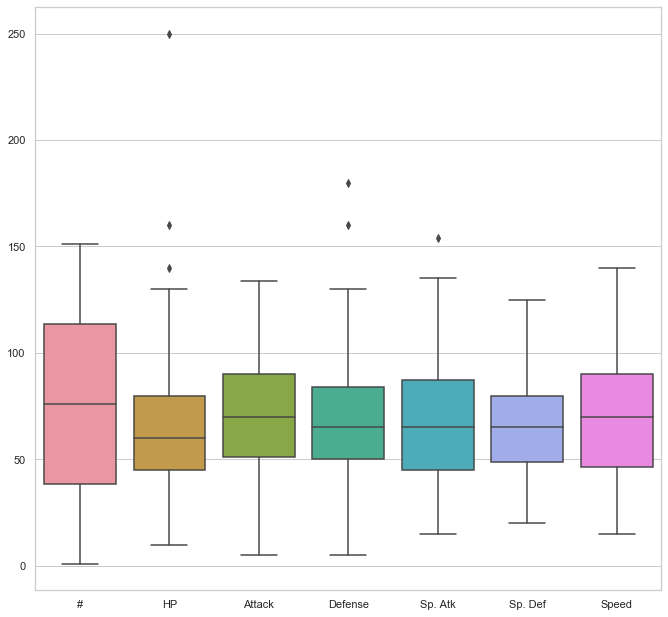

In [65]:
#SOLUTION
sns.boxplot(data=stats_df);

### `seaborn` themes

Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called 'darkgrid'.


Next, we'll change the theme to 'whitegrid' while making a violin plot.

Violin plots are useful alternatives to box plots.
They show the distribution (through the thickness of the violin) instead of only the summary statistics.
For example, we can visualize the distribution of Attack by Pokémon's primary type:

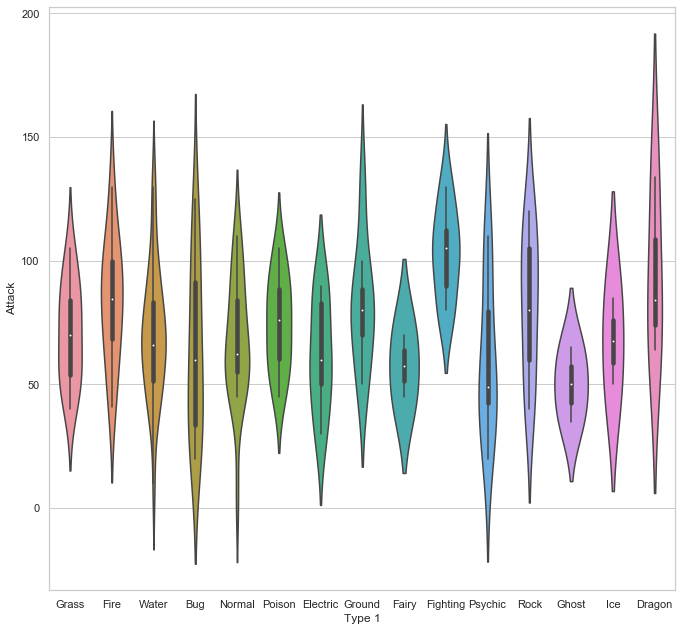

In [66]:
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=poke)

**Now, use the `palette=` argument to recolor the above chart**

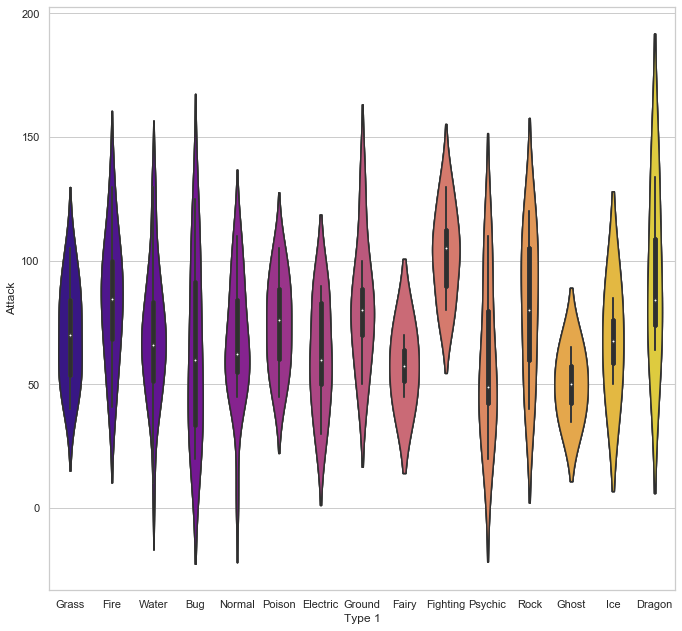

In [68]:
#SOLUTION: examples
sns.violinplot(x='Type 1', y='Attack', data=poke, palette = "muted");
sns.violinplot(x='Type 1', y='Attack', data=poke, palette = "ch:2.5,-.2,dark=.3");
sns.violinplot(x='Type 1', y='Attack', data=poke, palette = "Set3", n_colors=8, desat=1.5);
sns.violinplot(x='Type 1', y='Attack', data=poke,palette='plasma');

# Part 4: Repetition


## Loading the Datasets



In [179]:
#Reser params
rcParams['figure.figsize'] = 5, 5

In [54]:
transactions_raw = pd.read_excel("transactioncollection.xlsx")
transactions_raw.head(5)

,_id,to,type,subtype,status,amount,from,totalAmount,transactionHash,timeCreated,timeUpdated,__v,newsfeedId,note,metadata,metadata2
0,5bbd45031cccae4f7a929a1d,tcabaniss,airdrop,welcome,complete,244,admin,244,0xf2d8a8d249a0302ab5fdb2645b4d1ec1e3be5188acc9...,Tue Oct 09 2018 17:17:07 GMT-0700 (PDT),Tue Oct 09 2018 17:17:07 GMT-0700 (PDT),0,5bbd45031cccae4f7a929a1d,NaN,NaN,NaN
1,5bbd45431cccae4f7a929a23,vnmaniyar,airdrop,welcome,complete,246,admin,246,0xfa87aaa0fb1b6055914c44cf53cf627ee837242cec9d...,Tue Oct 09 2018 17:18:11 GMT-0700 (PDT),Tue Oct 09 2018 17:18:11 GMT-0700 (PDT),0,5bbd45431cccae4f7a929a23,NaN,NaN,NaN
2,5bbd45f21cccae4f7a929a2a,torhorton,airdrop,welcome,complete,159,admin,159,0x059cb327c2f9f4b9b8adc7fb5e5d8bee46d7289b47b6...,Tue Oct 09 2018 17:21:06 GMT-0700 (PDT),Tue Oct 09 2018 17:21:06 GMT-0700 (PDT),0,5bbd45f21cccae4f7a929a2a,NaN,NaN,NaN
3,5bbd46013d79fd101434bcdb,chrichen,p2p,default,complete,78,god,78,0xc199a3e6825957004b7976b668e5ca59d57b1a6d9967...,Tue Oct 09 2018 17:21:21 GMT-0700 (PDT),Tue Oct 09 2018 17:21:21 GMT-0700 (PDT),0,5bbd46013d79fd101434bcdb,NaN,NaN,NaN
4,5bbd460b1cccae4f7a929a2f,chrichen,airdrop,welcome,complete,233,admin,233,0x98952dae20d8b2167a7d7d7d186bf00c752d612b9bba...,Tue Oct 09 2018 17:21:31 GMT-0700 (PDT),Tue Oct 09 2018 17:21:31 GMT-0700 (PDT),0,5bbd460b1cccae4f7a929a2f,NaN,NaN,NaN


In [55]:
users_raw = pd.read_csv("usercollection.csv")
users_raw.head(5)

,_id,earningsThisYear,hidePhoto,level,pointToNextLevel,currentBalance,totalIdeasSubmitted,totalExpRedeemed,status,firstName,lastName,qid,location,walletId,timeCreated,timeUpdated,__v
0,ctennican,191,False,1,9,191,0,0,active,Christina,Tennican,Q10135137,San Jose,5bbd44e71cccae4f7a929a18,Tue Oct 09 2018 17:16:39 GMT-0700 (PDT),Mon Oct 22 2018 02:43:02 GMT-0700 (PDT),0
1,tcabaniss,244,False,2,256,244,0,0,active,Tami,Cabaniss,Q20012242,San Jose,5bbd44f81cccae4f7a929a19,Tue Oct 09 2018 17:16:56 GMT-0700 (PDT),Tue Oct 09 2018 17:17:07 GMT-0700 (PDT),0
2,vnmaniyar,3697,False,5,1303,3578,17,1,active,Vidit,Maniyar,Q10237922,San Jose,5bbd453c1cccae4f7a929a1f,Tue Oct 09 2018 17:18:04 GMT-0700 (PDT),Tue Sep 17 2019 15:32:12 GMT-0700 (PDT),0
3,mcouch,197,False,1,3,197,0,0,active,Matthew,Couch,Q20019880,Chandler,5bbd45991cccae4f7a929a25,Tue Oct 09 2018 17:19:37 GMT-0700 (PDT),Tue Aug 20 2019 17:46:45 GMT-0700 (PDT),0
4,torhorton,709,False,3,291,999,0,0,active,Tori,Horton,Q20052389,San Jose,5bbd459e1cccae4f7a929a26,Tue Oct 09 2018 17:19:42 GMT-0700 (PDT),Wed May 01 2019 14:47:36 GMT-0700 (PDT),0


**For both data frames, find mean, median, etc - think summary statistics.**

In [56]:
#SOLUTION
display(transactions_raw.describe(),users_raw.describe())

,amount,totalAmount,__v,metadata2
count,3.086500e+04,3.086500e+04,30865.0,0.0
mean,6.479832e+13,6.479832e+13,0.0,NaN
std,8.049610e+15,8.049610e+15,0.0,NaN
min,-1.000000e+00,-1.000000e+00,0.0,NaN
25%,5.000000e+01,5.000000e+01,0.0,NaN
50%,1.000000e+02,1.000000e+02,0.0,NaN
75%,1.750000e+02,1.760000e+02,0.0,NaN
max,1.000000e+18,1.000000e+18,0.0,NaN


,earningsThisYear,pointToNextLevel,currentBalance,totalIdeasSubmitted,totalExpRedeemed,__v
count,22470.000000,22470.000000,2.247000e+04,22470.000000,22470.000000,22470.0
mean,180.149266,174.536983,4.450378e+09,0.088963,0.000846,0.0
std,560.380192,368.473235,6.671116e+11,0.829041,0.030560,0.0
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0
25%,0.000000,36.000000,0.000000e+00,0.000000,0.000000,0.0
50%,155.000000,200.000000,1.530000e+02,0.000000,0.000000,0.0
75%,191.000000,200.000000,1.900000e+02,0.000000,0.000000,0.0
max,40189.000000,14210.000000,1.000000e+14,58.000000,2.000000,0.0


**[Viz] Plot the ‘totalAmount’ column for transactions data. Using xlim, ylim, or the .clip() method, zoom into the window that provides the most informative visualization.**

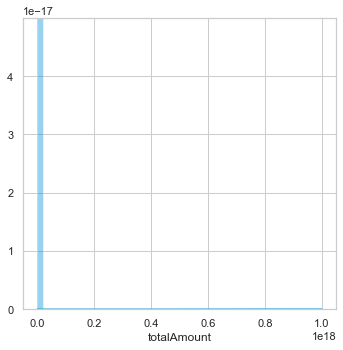

In [57]:
#SOLUTION
sns.distplot(transactions_raw["totalAmount"]);

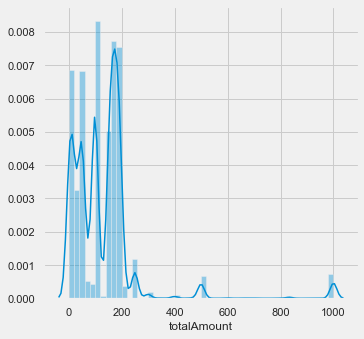

In [181]:
#SOLUTION 
lower = 0
upper = 1000
capped_amounts = transactions_raw['totalAmount'].clip(lower = lower, upper = upper) 
sns.distplot(capped_amounts);

**Find the # of transactions where the totalAmount is greater than 600.**

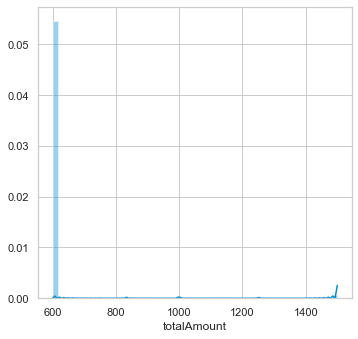

In [70]:
lower = 600
upper = 1500
power = transactions_raw['totalAmount'].clip(lower = lower, upper = upper) 
sns.distplot(power);

In [149]:
#SOLUTION
# Filter the dataset for only transaction amounts >600
temp = transactions_raw[transactions_raw['totalAmount']>600]
#Take the .shape of this subsetted data: 
temp.shape
#Shape returns a tuple with the dimensions of a dataframe, allowing us to index in. 
# shape[0] gives us the # rows, shape[1] the number of columns.
temp.shape[0]

501

In [75]:
#SOLUTION
lower = 600
power = transactions_raw[transactions_raw['totalAmount']>600]
power.shape[0]
# proportion = 100*power.shape[0]/transactions_raw.shape[0]

501

**Find all the unique kinds of transactions (hint, look at ‘type’)**


In [76]:
transactions_raw.type.unique()

array(['airdrop', 'p2p', 'idea', 'redeem', 'patent', 'earn'], dtype=object)

**Find all the unique locations for users. Sort alphabetically.**


In [77]:
users_raw.sort_values("location").location.unique()

array(['3PP - Bangalore - Genpact', '3PP - Beijing - Symbio',
       '3PP - Berlin - Arvato', '3PP - Chennai - Syntel',
       '3PP - Cleveland - RightSource', '3PP - Denver - EOS',
       '3PP - Hyderabad - IBM', '3PP - Magdeburg',
       '3PP - Manila - Sutherland', '3PP - Manila - ePerformax',
       '3PP - Moscow - Usethics', '3PP - Pennsylvania - RMS',
       '3PP - San Jose - Concentrix', '3PP - San Jose - Convergys',
       'Amsterdam', 'Austin', 'Bangalore', 'Bangkok', 'Beijing', 'Berlin',
       'Boston', 'Brussels - St Michel', 'Chandler', 'Chennai', 'Chicago',
       'Conshohocken', 'Denver', 'Dreilinden', 'Dublin', 'Dundalk',
       'Geneva', "Geneva - Quai de l'Ile", 'Guatemala', 'Gurgaon',
       'Hong Kong', 'Hunt Valley', 'Hyderabad', 'Istanbul - 2',
       'Kuala Lumpur', 'London', 'London - TCR', 'Luxembourg', 'Madrid',
       'Manila', 'Melbourne - Braintree', 'Mexico City', 'Milan',
       'Moscow', 'Mumbai', 'New Delhi', 'New York', 'Newton - 275',
       'Omaha', 

**Find the # of users/location, sorted in descending order.**


In [218]:
type(users_raw.groupby("location").count().iloc[:,0])

pandas.core.series.Series

In [217]:
pd.DataFrame(users_raw.groupby("location").count().iloc[:,0]).rename({"_id":'Users'}, axis=1)

,Users
location,
3PP - Bangalore - Genpact,74
3PP - Beijing - Symbio,2
3PP - Berlin - Arvato,1
3PP - Chennai - Syntel,2
3PP - Cleveland - RightSource,1
...,...
Vancouver - Howe Street,19
Vancouver - Virtual Way,4
Warsaw,14


In [186]:
users_per_loc = pd.DataFrame(users_raw.groupby("location").count().iloc[:, 0]).rename({"_id":'Users'}, axis=1)
users_per_loc_desc = users_per_loc.sort_values("Users", ascending=False)
users_per_loc_desc.head(10)

,Users
location,
San Jose,4135
Omaha,2211
Chennai,1927
Chandler,1576
Dublin,1322
Bangalore,1322
Shanghai,1272
Dundalk,1200
Chicago,699


**[Viz] Plot the # of users/location, sorted in descending order for the largest 30 locations**

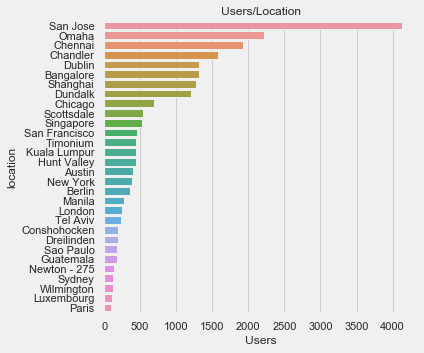

In [182]:
users_per_loc_desc
temp = users_per_loc_desc.reset_index().head(30)
plt.title("Users/Location")
sns.barplot(y=temp['location'], x=temp['Users']);

**Find the # of transactions that are from 'admin'**

In [117]:
len(transactions_raw[transactions_raw['from'].str.contains('admin')])

992

**Find the # of transactions that are from 'god'**


In [118]:
len(transactions_raw[transactions_raw['from'].str.contains('god')])

23133

**Find the last (most recent) transaction from 'god'**


In [189]:
god = transactions_raw[transactions_raw['from']=='god']

#last god trxn
god_sorted = pd.DataFrame(pd.to_datetime(god["timeCreated"]).sort_values(ascending=False))

In [201]:
god_sorted.reset_index().iloc[0]

index                              30864
timeCreated    2019-09-26 13:08:00-07:00
Name: 0, dtype: object